In [27]:
#! pip install openmeteo-requests
#! pip install requests-cache retry-requests numpy pandas
#! pip install scikit-learn


In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
from IPython.display import display_html

In [29]:
def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table', 'table style="display:inline"'), raw=True)

In [30]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

cities = [
    {"latitude": 46.00, "longitude": 8.96, "name": "Lugano"},
    {"latitude": 32.00, "longitude": -96.00, "name": "Dallas"},
    {"latitude": 3.88, "longitude": -77.03, "name": "Buenaventura"}
    # Add more cities here 
]
start_date = "1940-01-01"
end_date = "2024-06-25"
variables = ["temperature_2m", "precipitation"]

data = []
url = "https://customer-archive-api.open-meteo.com/v1/archive"

for city in cities:
    params = {
        "latitude": city["latitude"],
        "longitude": city["longitude"],
        "start_date": start_date,
        "end_date": end_date,
        "hourly": ",".join(variables),
        "apikey": "5ftjs2VK6XVIpyYM"
    
    }
    responses = openmeteo.weather_api(url, params=params)
    response = responses[0]
    hourly = response.Hourly()
    temperatures = hourly.Variables(0).ValuesAsNumpy()
    precipitations = hourly.Variables(1).ValuesAsNumpy()

    hourly_data = {
        "date": pd.date_range(
            start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
            end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
            freq=pd.Timedelta(seconds=hourly.Interval()),
            inclusive="left"
        ),
        "temperature_2m": temperatures,
        "precipitation": precipitations,
        "city": city["name"]
    }
    data.append(pd.DataFrame(hourly_data))

all_data = pd.concat(data)

In [31]:
Lugano_hourly_dataframe = all_data[all_data["city"] == ('Lugano') ]
Dallas_hourly_dataframe = all_data[all_data["city"] == ('Dallas') ]
Buenaventura_hourly_dataframe = all_data[all_data["city"] == ('Buenaventura') ]

Lugano_hourly_dataframe = Lugano_hourly_dataframe.drop("city", axis=1)
Dallas_hourly_dataframe = Dallas_hourly_dataframe.drop("city", axis=1)
Buenaventura_hourly_dataframe = Buenaventura_hourly_dataframe.drop("city",axis=1)

In [32]:
Lugano_hourly_dataframe = Lugano_hourly_dataframe.fillna(0)
Dallas_hourly_dataframe = Dallas_hourly_dataframe.fillna(0)
Buenaventura_hourly_dataframe = Buenaventura_hourly_dataframe.fillna(0)

In [33]:
Lugano_hourly_dataframe["date"] = pd.to_datetime(Lugano_hourly_dataframe["date"])
Lugano_hourly_dataframe.set_index("date", inplace=True)

Buenaventura_hourly_dataframe["date"] = pd.to_datetime(Buenaventura_hourly_dataframe["date"])
Buenaventura_hourly_dataframe.set_index("date", inplace=True)

Dallas_hourly_dataframe["date"] = pd.to_datetime(Dallas_hourly_dataframe["date"])
Dallas_hourly_dataframe.set_index("date", inplace=True)

In [34]:
Lugano_monthly_dataframe = Lugano_hourly_dataframe.resample("ME").mean()
Dallas_monthly_dataframe = Dallas_hourly_dataframe.resample("ME").mean()
Buenaventura_monthly_dataframe = Buenaventura_hourly_dataframe.resample("ME").mean()

In [35]:
display_side_by_side(Lugano_monthly_dataframe.tail(), Dallas_monthly_dataframe.tail(), Buenaventura_monthly_dataframe.tail())

,temperature_2m,precipitation
date,,
2024-02-29 00:00:00+00:00,8.497727,0.312500
2024-03-31 00:00:00+00:00,9.237638,0.459543
2024-04-30 00:00:00+00:00,12.316264,0.168889
2024-05-31 00:00:00+00:00,15.704842,0.579570
2024-06-30 00:00:00+00:00,19.475668,0.262500
,temperature_2m,precipitation
date,,
2024-02-29 00:00:00+00:00,13.763353,0.145115
2024-03-31 00:00:00+00:00,16.468166,0.182258


In [36]:
Lugano_yearly_dataframe = Lugano_hourly_dataframe.resample("YE").mean()
Dallas_yearly_dataframe = Dallas_hourly_dataframe.resample("YE").mean()
Buenaventura_yearly_dataframe = Buenaventura_hourly_dataframe.resample("YE").mean()

In [37]:
display_side_by_side(Lugano_yearly_dataframe.tail(), Dallas_yearly_dataframe.tail(), Buenaventura_yearly_dataframe.tail())

,temperature_2m,precipitation
date,,
2020-12-31 00:00:00+00:00,13.833609,0.200865
2021-12-31 00:00:00+00:00,13.022195,0.208790
2022-12-31 00:00:00+00:00,14.658760,0.143174
2023-12-31 00:00:00+00:00,14.198577,0.189406
2024-12-31 00:00:00+00:00,11.592781,0.310617
,temperature_2m,precipitation
date,,
2020-12-31 00:00:00+00:00,19.886644,0.149442
2021-12-31 00:00:00+00:00,19.814205,0.151495


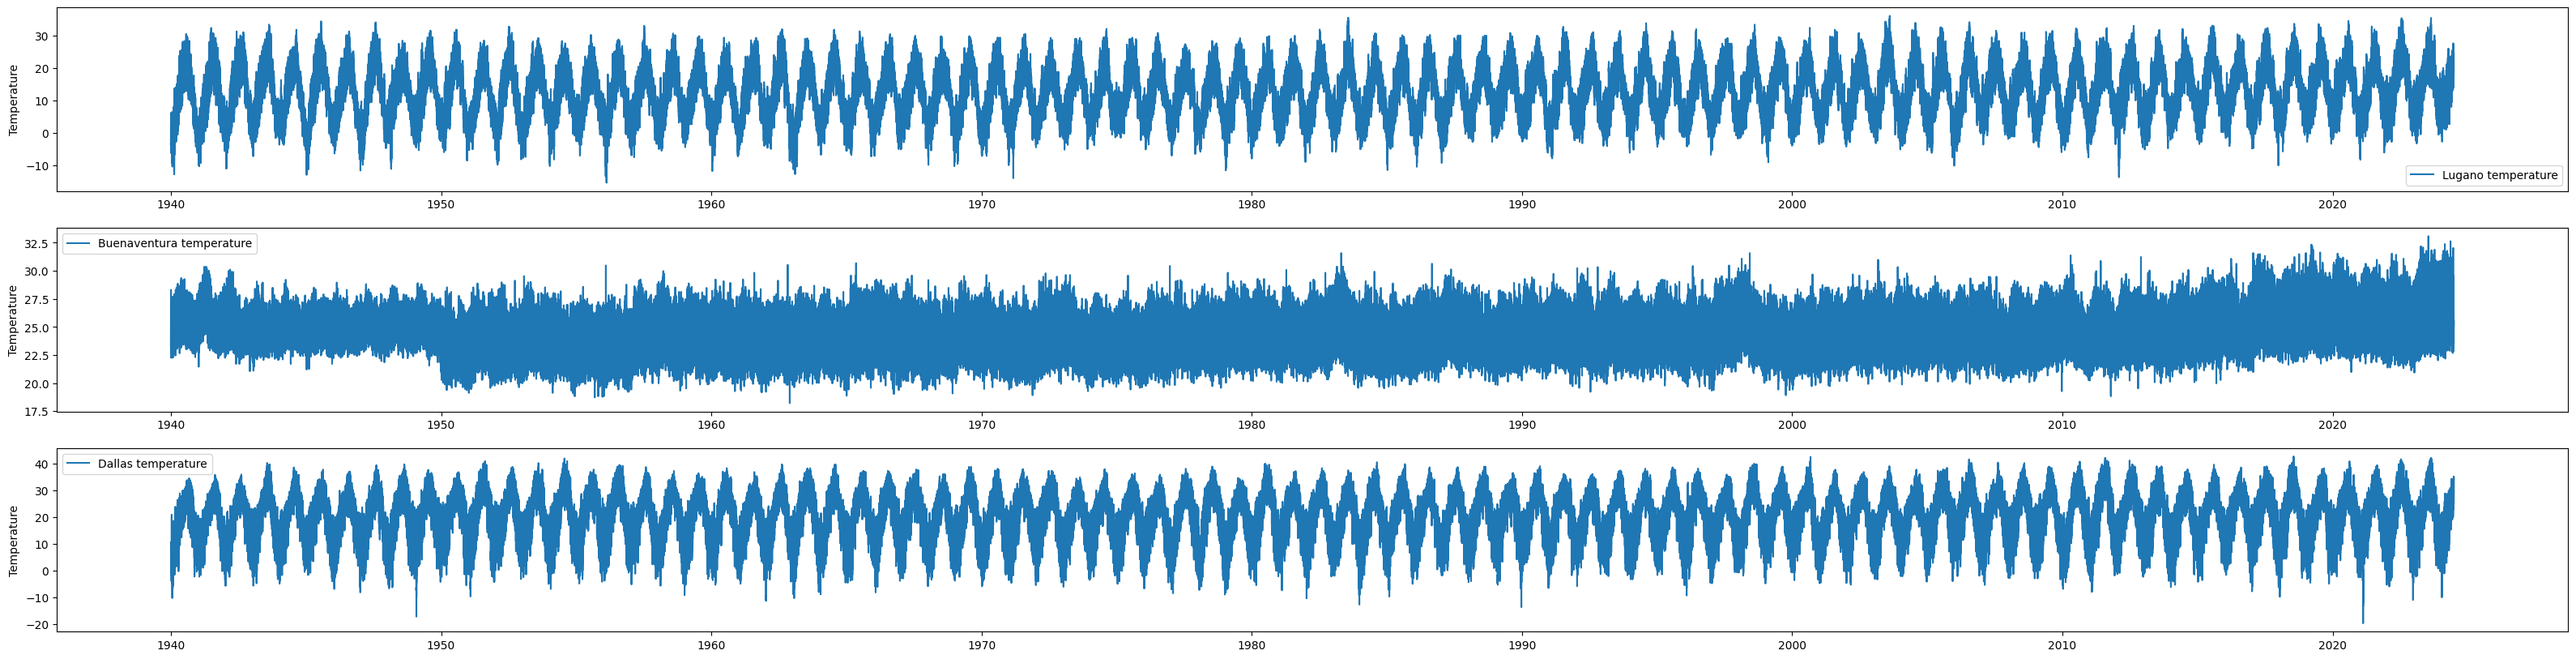

In [38]:
fig, ax = plt.subplots(3, 1, figsize=(40, 10))
ax[0].plot(Lugano_hourly_dataframe.index, Lugano_hourly_dataframe["temperature_2m"], label="Lugano temperature")
ax[1].plot(Buenaventura_hourly_dataframe.index, Buenaventura_hourly_dataframe["temperature_2m"], label="Buenaventura temperature")
ax[2].plot(Dallas_hourly_dataframe.index, Dallas_hourly_dataframe["temperature_2m"], label="Dallas temperature")
ax[0].set_ylabel("Temperature")
ax[1].set_ylabel("Temperature")
ax[2].set_ylabel("Temperature")
ax[0].legend()
ax[1].legend()
ax[2].legend()

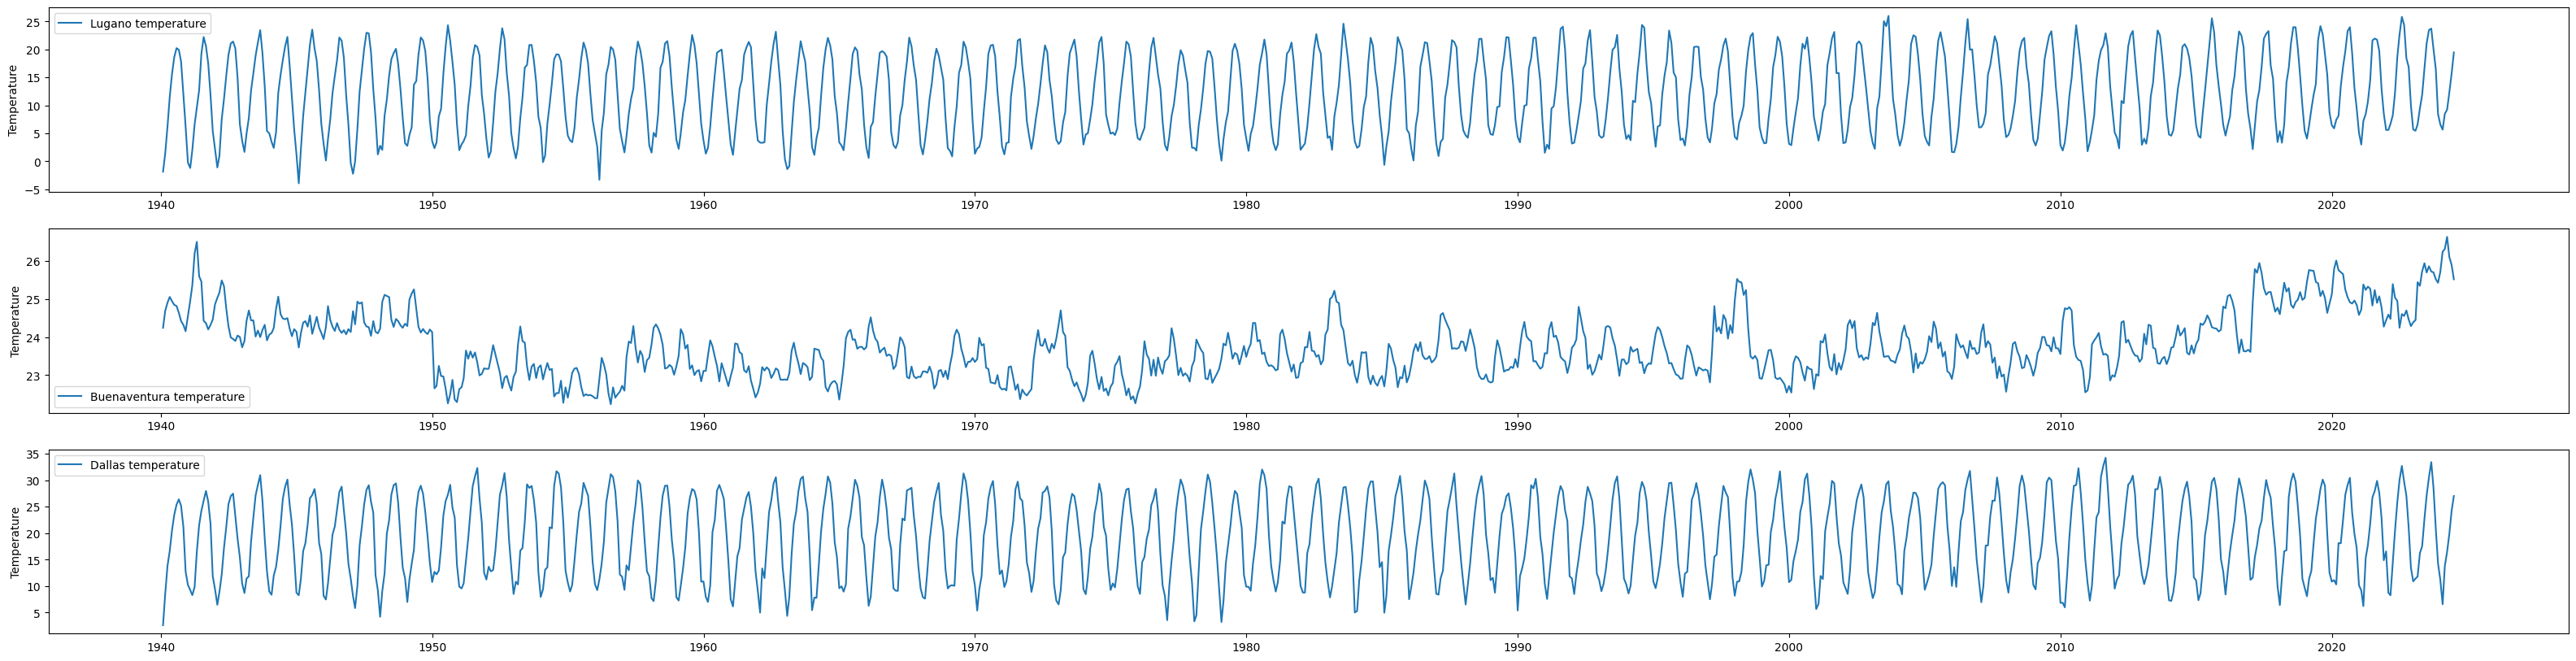

In [39]:
fig, ax = plt.subplots(3, 1, figsize=(40, 10))
ax[0].plot(Lugano_monthly_dataframe.index, Lugano_monthly_dataframe["temperature_2m"], label="Lugano temperature")
ax[1].plot(Buenaventura_monthly_dataframe.index, Buenaventura_monthly_dataframe["temperature_2m"], label="Buenaventura temperature")
ax[2].plot(Dallas_monthly_dataframe.index, Dallas_monthly_dataframe["temperature_2m"], label="Dallas temperature")
ax[0].set_ylabel("Temperature")
ax[1].set_ylabel("Temperature")
ax[2].set_ylabel("Temperature")
ax[0].legend()
ax[1].legend()
ax[2].legend()

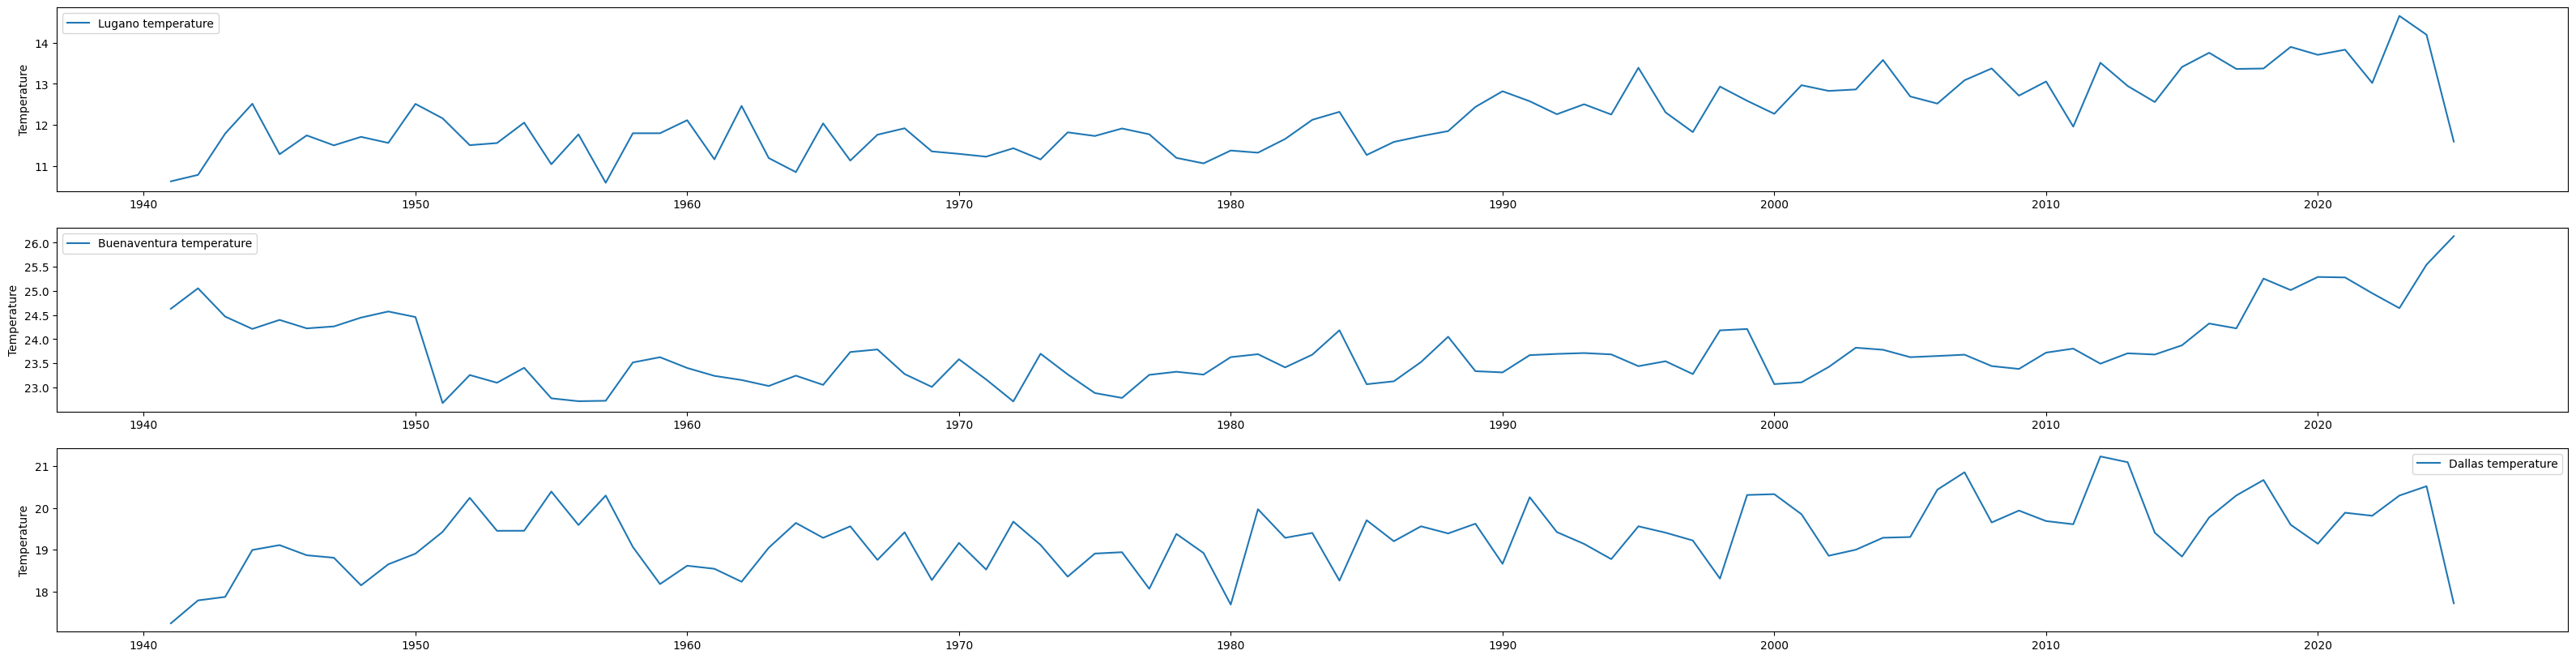

In [40]:
fig, ax = plt.subplots(3, 1, figsize=(40, 10))
ax[0].plot(Lugano_yearly_dataframe.index, Lugano_yearly_dataframe["temperature_2m"], label="Lugano temperature")
ax[1].plot(Buenaventura_yearly_dataframe.index, Buenaventura_yearly_dataframe["temperature_2m"], label="Buenaventura temperature")
ax[2].plot(Dallas_yearly_dataframe.index, Dallas_yearly_dataframe["temperature_2m"], label="Dallas temperature")
ax[0].set_ylabel("Temperature")
ax[1].set_ylabel("Temperature")
ax[2].set_ylabel("Temperature")
ax[0].legend()
ax[1].legend()
ax[2].legend()

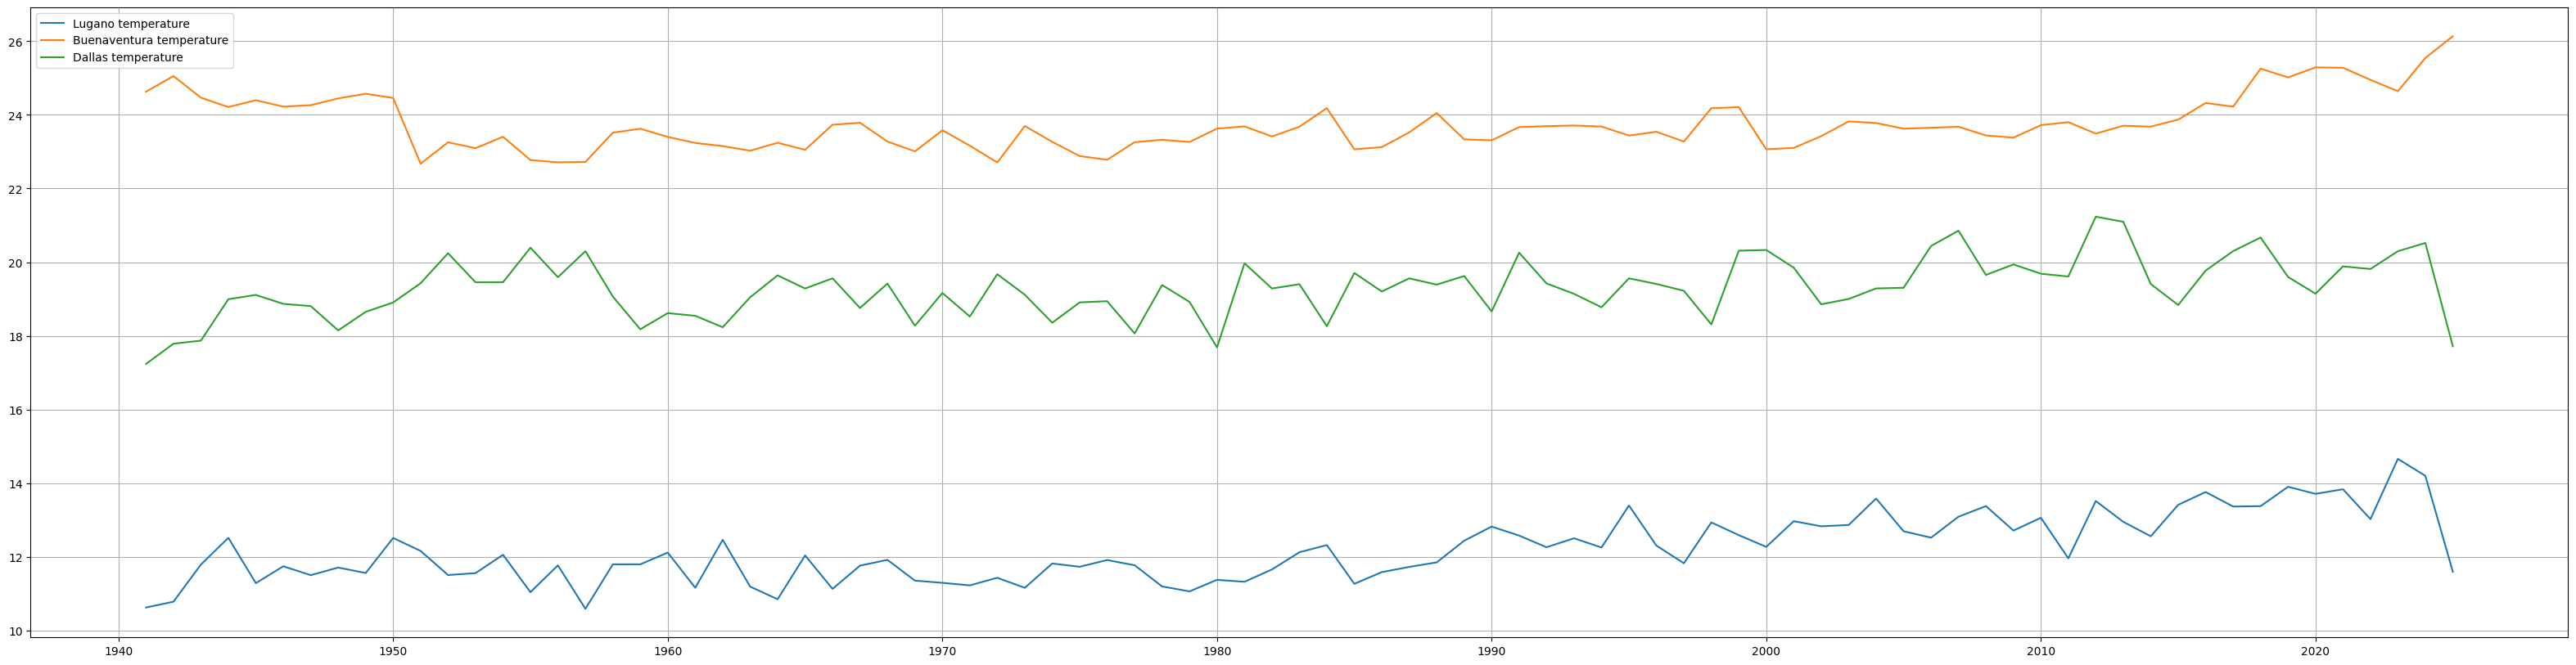

In [41]:
plt.figure(figsize=(40, 10))
plt.plot(Lugano_yearly_dataframe.index, Lugano_yearly_dataframe["temperature_2m"], label="Lugano temperature")
plt.plot(Buenaventura_yearly_dataframe.index, Buenaventura_yearly_dataframe["temperature_2m"], label="Buenaventura temperature")
plt.plot(Dallas_yearly_dataframe.index, Dallas_yearly_dataframe["temperature_2m"], label="Dallas temperature")
plt.legend()
plt.grid()

In [42]:
# Generate data for each year
years_2019 = pd.date_range(start='2019', end='2020', freq='M')
Buenaventura_2019 = pd.DataFrame({
    'temperature_2m': np.random.normal(loc=25, scale=2, size=len(years_2019)),
    'date': years_2019,
    'location': 'Buenaventura'
})
Lugano_2019 = pd.DataFrame({
    'temperature_2m': np.random.normal(loc=15, scale=2, size=len(years_2019)),
    'date': years_2019,
    'location': 'Lugano'
})
Dallas_2019 = pd.DataFrame({
    'temperature_2m': np.random.normal(loc=20, scale=3, size=len(years_2019)),
    'date': years_2019,
    'location': 'Dallas'
})

years_2020 = pd.date_range(start='2020', end='2021', freq='M')
Buenaventura_2020 = pd.DataFrame({
    'temperature_2m': np.random.normal(loc=25, scale=2, size=len(years_2020)),
    'date': years_2020,
    'location': 'Buenaventura'
})
Lugano_2020 = pd.DataFrame({
    'temperature_2m': np.random.normal(loc=15, scale=2, size=len(years_2020)),
    'date': years_2020,
    'location': 'Lugano'
})
Dallas_2020 = pd.DataFrame({
    'temperature_2m': np.random.normal(loc=20, scale=3, size=len(years_2020)),
    'date': years_2020,
    'location': 'Dallas'
})

years_2021 = pd.date_range(start='2021', end='2022', freq='M')
Buenaventura_2021 = pd.DataFrame({
    'temperature_2m': np.random.normal(loc=25, scale=2, size=len(years_2021)),
    'date': years_2021,
    'location': 'Buenaventura'
})
Lugano_2021 = pd.DataFrame({
    'temperature_2m': np.random.normal(loc=15, scale=2, size=len(years_2021)),
    'date': years_2021,
    'location': 'Lugano'
})
Dallas_2021 = pd.DataFrame({
    'temperature_2m': np.random.normal(loc=20, scale=3, size=len(years_2021)),
    'date': years_2021,
    'location': 'Dallas'
})

years_2022 = pd.date_range(start='2022', end='2023', freq='M')
Buenaventura_2022 = pd.DataFrame({
    'temperature_2m': np.random.normal(loc=25, scale=2, size=len(years_2022)),
    'date': years_2022,
    'location': 'Buenaventura'
})
Lugano_2022 = pd.DataFrame({
    'temperature_2m': np.random.normal(loc=15, scale=2, size=len(years_2022)),
    'date': years_2022,
    'location': 'Lugano'
})
Dallas_2022 = pd.DataFrame({
    'temperature_2m': np.random.normal(loc=20, scale=3, size=len(years_2022)),
    'date': years_2022,
    'location': 'Dallas'
})

years_2023 = pd.date_range(start='2023', end='2024', freq='M')
Buenaventura_2023 = pd.DataFrame({
    'temperature_2m': np.random.normal(loc=25, scale=2, size=len(years_2023)),
    'date': years_2023,
    'location': 'Buenaventura'
})
Lugano_2023 = pd.DataFrame({
    'temperature_2m': np.random.normal(loc=15, scale=2, size=len(years_2023)),
    'date': years_2023,
    'location': 'Lugano'
})
Dallas_2023 = pd.DataFrame({
    'temperature_2m': np.random.normal(loc=20, scale=3, size=len(years_2023)),
    'date': years_2023,
    'location': 'Dallas'
})

# Concatenate all dataframes
df = pd.concat([Buenaventura_2019, Lugano_2019, Dallas_2019,
                Buenaventura_2020, Lugano_2020, Dallas_2020,
                Buenaventura_2021, Lugano_2021, Dallas_2021,
                Buenaventura_2022, Lugano_2022, Dallas_2022,
                Buenaventura_2023, Lugano_2023, Dallas_2023])

# Create a box plot using Plotly Express
fig = px.box(df, x='location', y='temperature_2m', color=df['date'].dt.year.astype(str),
             title='Yearly Temperature Comparison', labels={'temperature_2m': 'Temperature (°C)', 'location': 'Location'})

fig.show()


C:\Users\William\AppData\Local\Temp\ipykernel_11108\1046146095.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\William\AppData\Local\Temp\ipykernel_11108\1046146095.py:19: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\William\AppData\Local\Temp\ipykernel_11108\1046146095.py:36: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\William\AppData\Local\Temp\ipykernel_11108\1046146095.py:53: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\William\AppData\Local\Temp\ipykernel_11108\1046146095.py:70: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



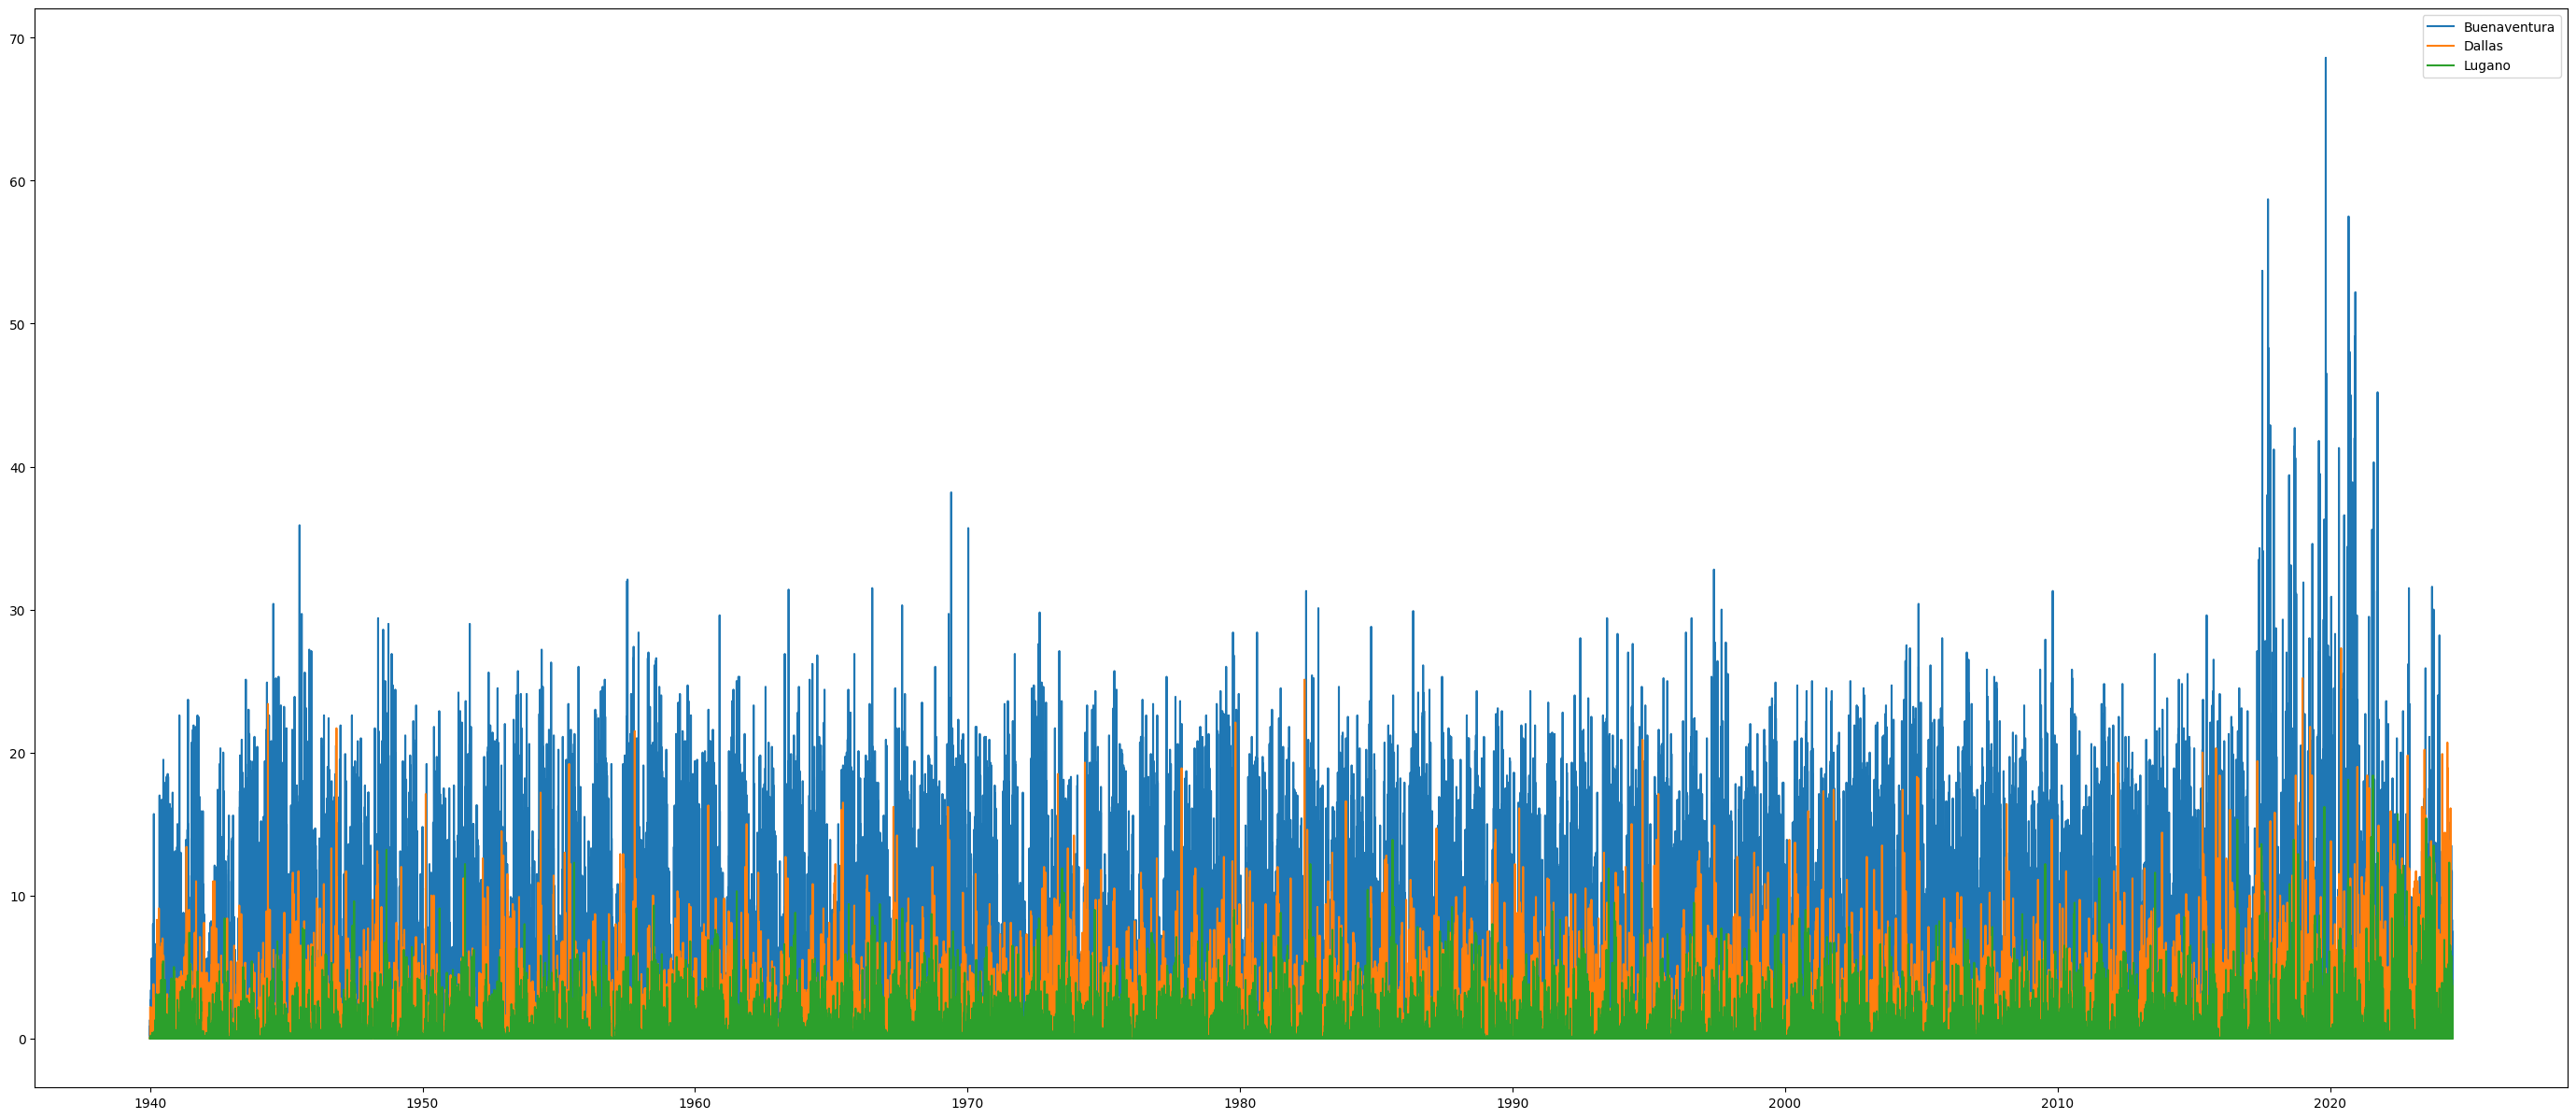

In [43]:
plt.figure(figsize=(35, 15))
plt.plot(Buenaventura_hourly_dataframe.index, Buenaventura_hourly_dataframe["precipitation"], label="Buenaventura")
plt.plot(Dallas_hourly_dataframe.index, Dallas_hourly_dataframe["precipitation"], label="Dallas")
plt.plot(Lugano_hourly_dataframe.index, Lugano_hourly_dataframe["precipitation"], label="Lugano")
plt.legend()

In [44]:
Lugano_month_avg = Lugano_hourly_dataframe.groupby(Lugano_hourly_dataframe.index.month).mean()
Lugano_month_avg.index.name = "month"

Buenaventura_month_avg = Buenaventura_hourly_dataframe.groupby(Buenaventura_hourly_dataframe.index.month).mean()
Buenaventura_month_avg.index.name = "month"

Dallas_month_avg = Dallas_hourly_dataframe.groupby(Dallas_hourly_dataframe.index.month).mean()
Dallas_month_avg.index.name = "month"

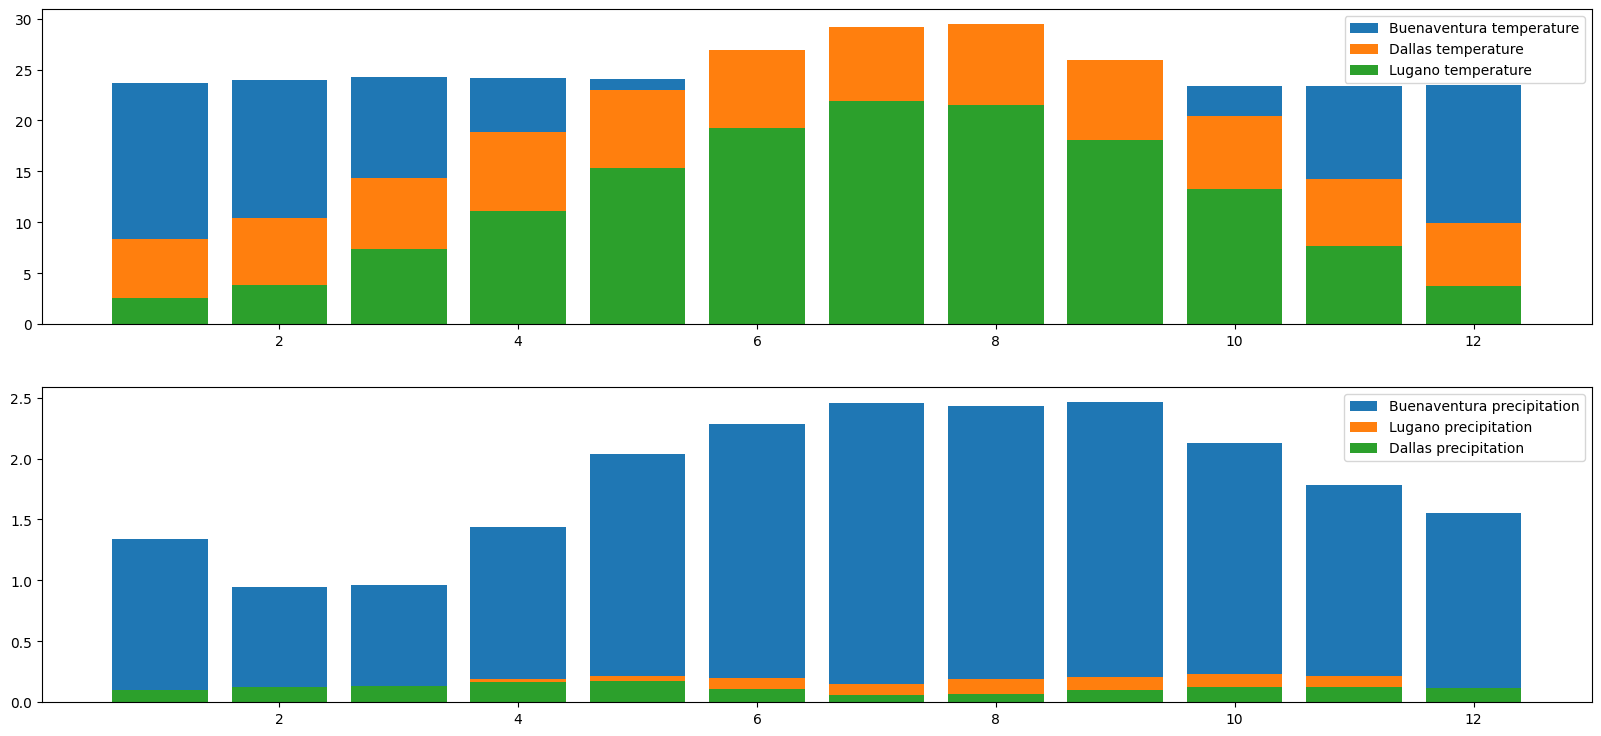

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(20, 9))
ax[0].bar(Buenaventura_month_avg.index, Buenaventura_month_avg["temperature_2m"], label="Buenaventura temperature")
ax[1].bar(Buenaventura_month_avg.index, Buenaventura_month_avg["precipitation"], label="Buenaventura precipitation")
ax[0].bar(Dallas_month_avg.index, Dallas_month_avg["temperature_2m"], label="Dallas temperature")
ax[0].bar(Lugano_month_avg.index, Lugano_month_avg["temperature_2m"], label="Lugano temperature")
ax[1].bar(Lugano_month_avg.index, Lugano_month_avg["precipitation"], label="Lugano precipitation")
ax[1].bar(Dallas_month_avg.index, Dallas_month_avg["precipitation"], label="Dallas precipitation")
ax[0].legend()
ax[1].legend()


In [46]:
mean_month_avg = Lugano_month_avg.copy()
mean_month_avg["temperature_2m"] = (Lugano_month_avg["temperature_2m"] + Dallas_month_avg["temperature_2m"])/2
mean_month_avg["precipitation"] = (Lugano_month_avg["precipitation"] + Dallas_month_avg["precipitation"])/2

Lugano_2022 = Lugano_monthly_dataframe.loc['2022']
Lugano_2024 = Lugano_monthly_dataframe.loc['2024']

In [47]:
Lugano_2024_monthly = Lugano_2024.resample("ME").mean()
Lugano_2024_redone = pd.DataFrame()
Lugano_2024_redone["temperature_2m"] = Lugano_2024_monthly["temperature_2m"].values
Lugano_2024_redone["precipitation"] = Lugano_2024_monthly["precipitation"].values
Lugano_2024_redone.index = [1, 2, 3, 4, 5, 6]

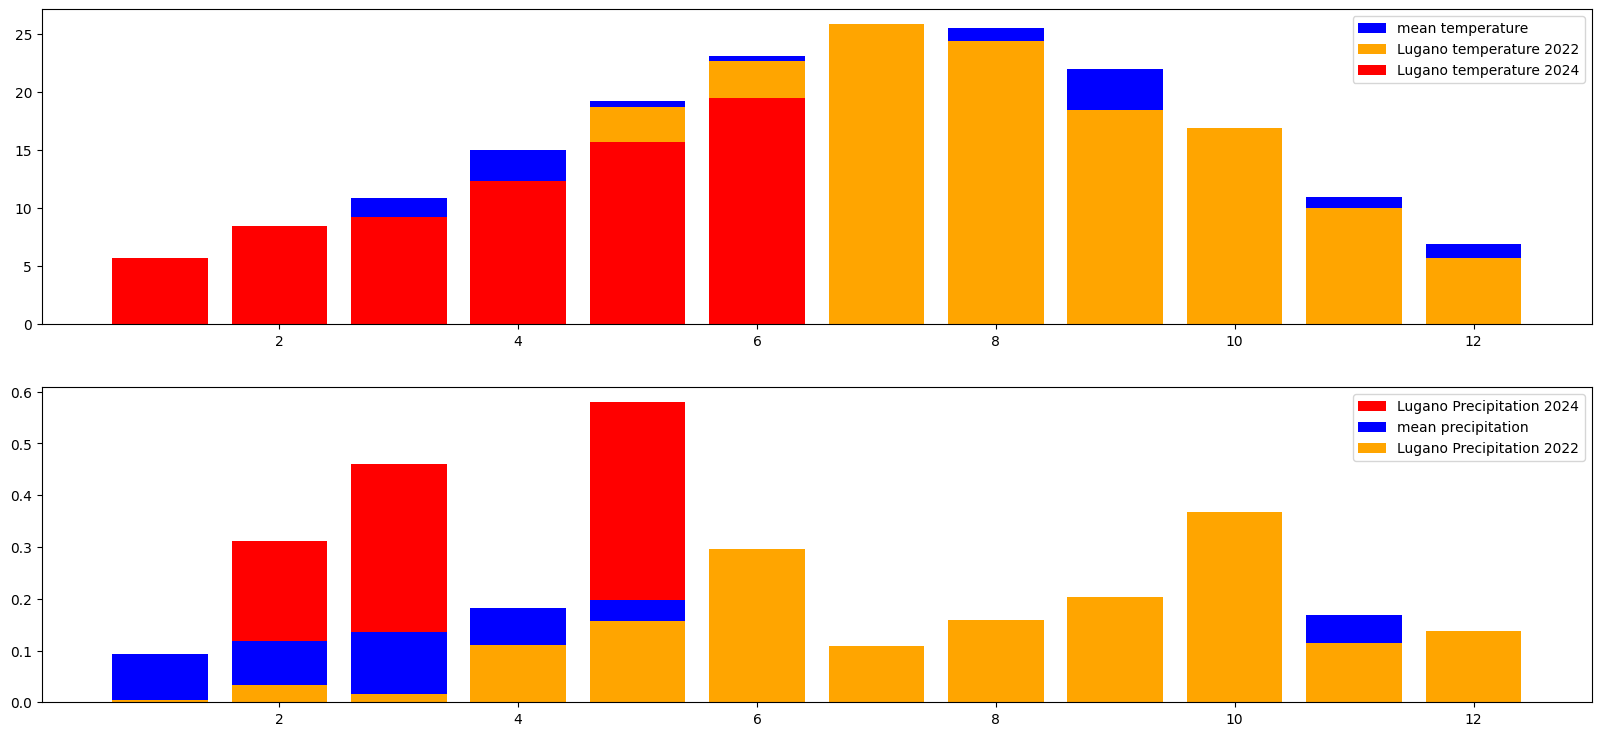

In [48]:
# we did not tak in consideration Buenaventura because it has abnormal values
fig, ax = plt.subplots(2, 1, figsize=(20, 9))
ax[1].bar(Lugano_2024_redone.index, Lugano_2024_redone["precipitation"], label="Lugano Precipitation 2024", color="red")
ax[0].bar(mean_month_avg.index, mean_month_avg["temperature_2m"], label="mean temperature", color="blue")
ax[0].bar(mean_month_avg.index, Lugano_2022["temperature_2m"], label="Lugano temperature 2022", color="orange")
ax[1].bar(mean_month_avg.index, mean_month_avg["precipitation"], label="mean precipitation", color="blue")
ax[1].bar(mean_month_avg.index, Lugano_2022["precipitation"], label="Lugano Precipitation 2022", color="orange")
ax[0].bar(Lugano_2024_redone.index, Lugano_2024_redone["temperature_2m"], label="Lugano temperature 2024", color="red")
ax[0].legend()
ax[1].legend()

In [49]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Define a list of cities with their coordinates
cities = [
    {"latitude": 46.003677, "longitude": 8.951052, "name": "Lugano"},
    {"latitude": 32.7767, "longitude": -96.7970, "name": "Dallas"},
    {"latitude": 3.8773, "longitude": -77.0306, "name": "Buenaventura"}
    # Add more cities as needed
]

# Define the parameters for the API request
url = "https://customer-climate-api.open-meteo.com/v1/climate"
models = ["CMCC_CM2_VHR4", "FGOALS_f3_H", "HiRAM_SIT_HR", "MRI_AGCM3_2_S", "EC_Earth3P_HR", "MPI_ESM1_2_XR", "NICAM16_8S"]
start_date = "1950-01-01"
end_date = "2050-12-31"
daily_variable = "temperature_2m_mean"
apikey = "5ftjs2VK6XVIpyYM"

# Initialize a dictionary to store dataframes for each city
city_dataframes = {}

# Loop through each city and fetch the weather data
for city in cities:
    params = {
        "latitude": city["latitude"],
        "longitude": city["longitude"],
        "start_date": start_date,
        "end_date": end_date,
        "models": models,
        "daily": daily_variable,
        "apikey": apikey
    }
    
    responses = openmeteo.weather_api(url, params=params)
    
    # Process the response for the current city
    response = responses[0]
    print(f"Processing data for {city['name']}:")
    print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
    print(f"Elevation {response.Elevation()} m asl")
    print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
    print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")
    
    # Process daily data
    daily = response.Daily()
    daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()
    
    daily_data = {
        "date": pd.date_range(
            start=pd.to_datetime(daily.Time(), unit="s", utc=True),
            end=pd.to_datetime(daily.TimeEnd(), unit="s", utc=True),
            freq=pd.Timedelta(seconds=daily.Interval()),
            inclusive="left"
        )
    }
    daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
    
    # Create a DataFrame for the current city and add it to the dictionary
    city_dataframe = pd.DataFrame(data=daily_data)
    city_dataframes[city["name"]] = city_dataframe


Processing data for Lugano:
Coordinates 45.90000915527344°N 8.900009155273438°E
Elevation 286.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Processing data for Dallas:
Coordinates 32.80000305175781°N -96.79999542236328°E
Elevation 137.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Processing data for Buenaventura:
Coordinates 3.9000015258789062°N -77.0°E
Elevation 8.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s


Processing data for Lugano:
Coordinates 45.90000915527344°N 8.900009155273438°E
Elevation 286.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Processing data for Dallas:
Coordinates 32.80000305175781°N -96.79999542236328°E
Elevation 137.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Processing data for Buenaventura:
Coordinates 3.9000015258789062°N -77.0°E
Elevation 8.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s


C:\Users\William\AppData\Local\Temp\ipykernel_11108\1890741290.py:45: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



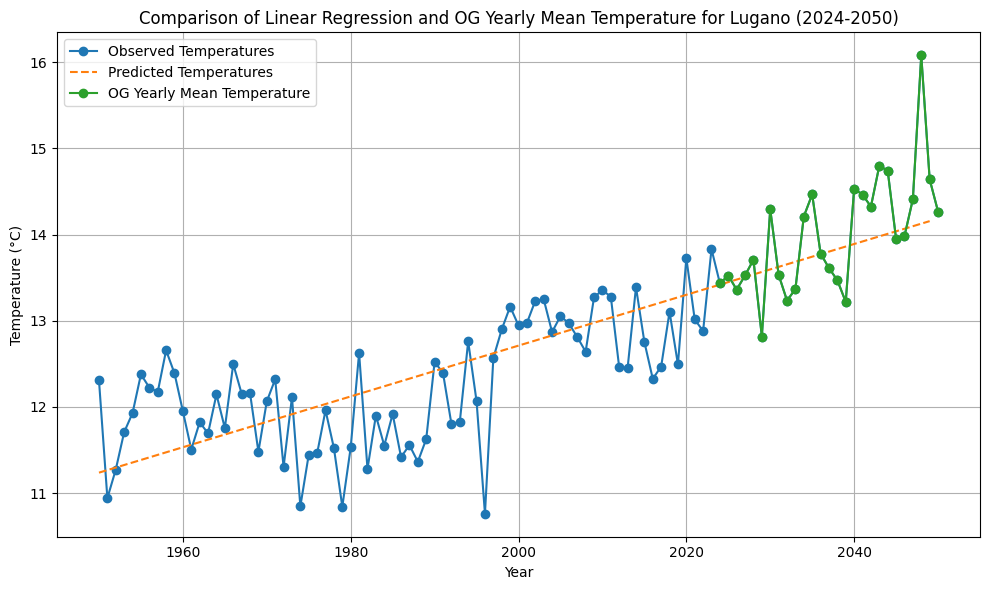

C:\Users\William\AppData\Local\Temp\ipykernel_11108\1890741290.py:45: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



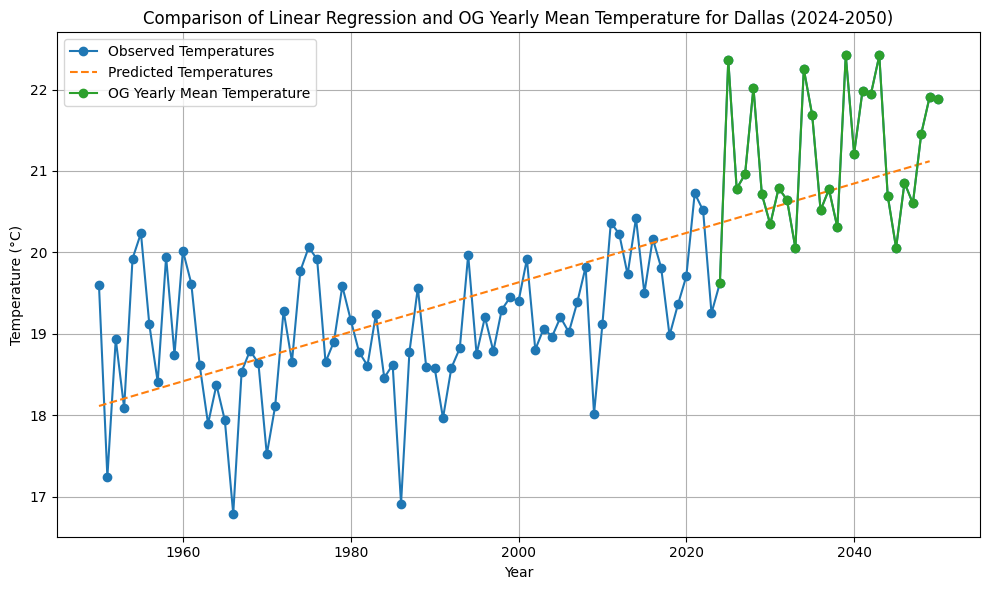

C:\Users\William\AppData\Local\Temp\ipykernel_11108\1890741290.py:45: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



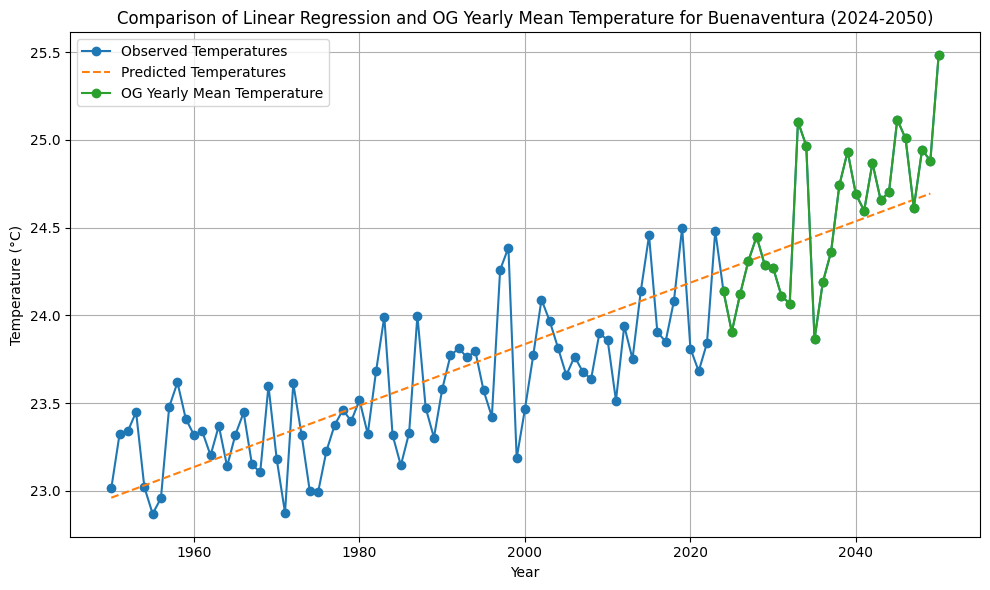

In [51]:
# Loop through each city and fetch the weather data
for city in cities:
    params = {
        "latitude": city["latitude"],
        "longitude": city["longitude"],
        "start_date": start_date,
        "end_date": end_date,
        "models": models,
        "daily": daily_variable,
        "apikey": apikey
    }
    
    responses = openmeteo.weather_api(url, params=params)
    
    # Process the response for the current city
    response = responses[0]
    print(f"Processing data for {city['name']}:")
    print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
    print(f"Elevation {response.Elevation()} m asl")
    print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
    print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")
    
    # Process daily data
    daily = response.Daily()
    daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()
    
    daily_data = {
        "date": pd.date_range(
            start=pd.to_datetime(daily.Time(), unit="s", utc=True),
            end=pd.to_datetime(daily.TimeEnd(), unit="s", utc=True),
            freq=pd.Timedelta(seconds=daily.Interval()),
            inclusive="left"
        )
    }
    daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
    
    # Create a DataFrame for the current city and add it to the dictionary
    city_dataframe = pd.DataFrame(data=daily_data)
    city_dataframes[city["name"]] = city_dataframe

# Plotting the data for each city
for city_name, daily_dataframe in city_dataframes.items():
    # Resample daily data to yearly data
    daily_dataframe.set_index('date', inplace=True)
    yearly_data = daily_dataframe.resample("Y").mean()

    # Extract the year from the date index
    yearly_data['year'] = yearly_data.index.year

    # Linear regression for temperature vs year
    X = yearly_data['year'].values.reshape(-1, 1)
    y = yearly_data['temperature_2m_mean'].values

    # Fit the linear regression model
    model = LinearRegression().fit(X, y)

    # Predict temperatures until 2050
    future_years = np.arange(1950, 2050).reshape(-1, 1)
    future_temperatures = model.predict(future_years)

    # Plotting the linear regression results
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_data['year'], y, label='Observed Temperatures', marker='o', linestyle='-')
    plt.plot(future_years, future_temperatures, label='Predicted Temperatures', linestyle='--')

    # Extract the year from the 'date' column in daily_dataframe and filter for years 2024 to 2050
    daily_dataframe['year'] = daily_dataframe.index.year
    filtered_dataframe = daily_dataframe[(daily_dataframe['year'] >= 2024) & (daily_dataframe['year'] <= 2050)]

    # Group by 'year' and calculate the mean temperature for each year
    yearly_mean_temperature = filtered_dataframe.groupby('year')['temperature_2m_mean'].mean()

    # Plotting the yearly mean temperatures from daily_dataframe
    plt.plot(yearly_mean_temperature.index, yearly_mean_temperature.values, label='OG Yearly Mean Temperature', marker='o', linestyle='-')

    # Customizing the plot
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Comparison of Linear Regression and OG Yearly Mean Temperature for {city_name} (2024-2050)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()